In [1]:
import pandas as pd
df=pd.read_csv("advertising.csv")
print(df.head(2))

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4


In [2]:
df.drop(["Unnamed: 0"], inplace=True, axis=1)
print(df.head(2))

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4


In [3]:
X=df.drop(["Sales"],axis=1)
Y=df["Sales"]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [6]:
m=model.coef_
c=model.intercept_
print(m,c)

[0.04391531 0.20027962 0.00184368] 2.880255286331323


In [7]:
print("The linear regression line is: Y=",m[0],"a+",m[1],"b+",m[2],"c+",c)

The linear regression line is: Y= 0.04391531369103204 a+ 0.20027961716022194 b+ 0.0018436817790911644 c+ 2.880255286331323


In [8]:
y_pred=model.predict(X_test)
print(y_pred[:5])

[10.05866652  7.43318827  6.95305695 24.16874598 11.98172029]


In [9]:
def mypredictor(a,b,c):
    return m[0]*a+m[1]*b+m[2]*c
print("Predicted value for 12,15,19 is: ",mypredictor(12,15,19))

Predicted value for 12,15,19 is:  3.5662079754984455


In [10]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
import numpy as np
mse=mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("MSE: ",mse)
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2: ",r2)

MSE:  3.691394845698606
RMSE:  1.921300300759516
MAE:  1.2333759522850207
R2:  0.8649018906637793


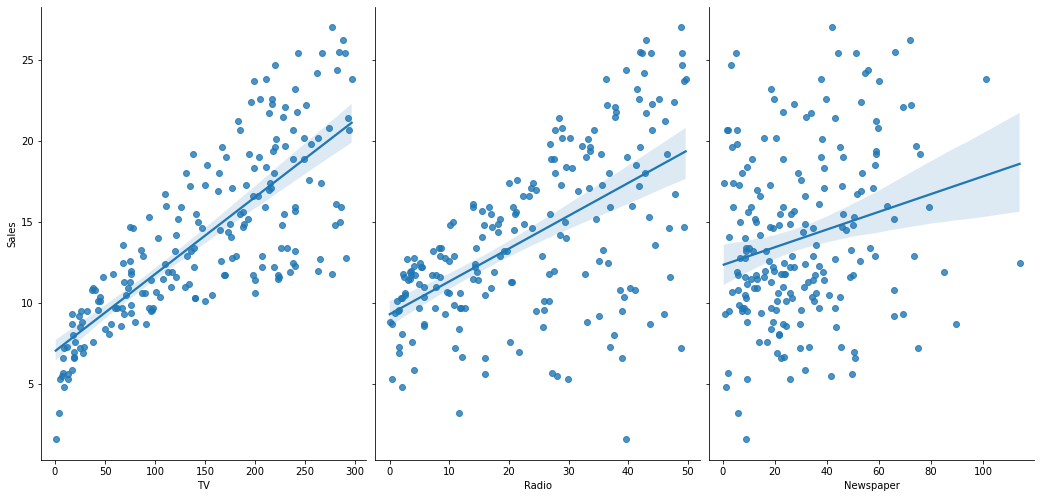

In [11]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')